In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
df = pd.read_csv("../data/heart_disease.csv")

In [5]:
X = df.drop("num", axis=1)
y = df["num"]

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [8]:
explained_variance = pca.explained_variance_ratio_

In [9]:
plt.figure(figsize=(14,6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

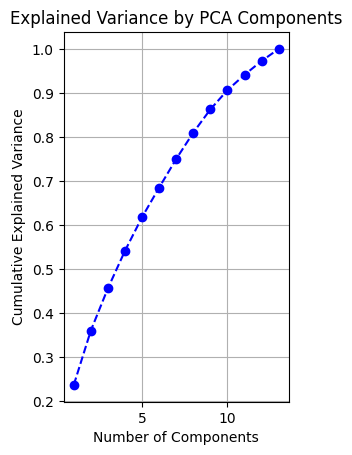

In [10]:
# Plot 1: Cumulative variance
plt.subplot(1,2,1)
plt.plot(range(1, len(explained_variance)+1),
         explained_variance.cumsum(),
         marker='o', linestyle='--', color="blue")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid(True)

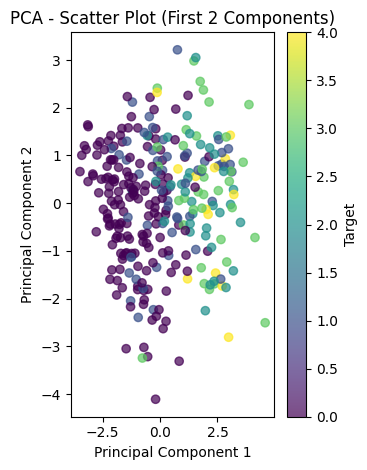

In [11]:
# 6. Scatter Plot for first 2 components
plt.subplot(1,2,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="viridis", alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - Scatter Plot (First 2 Components)")
plt.colorbar(label="Target")

plt.tight_layout()
plt.show()


In [12]:
pca_final = PCA(n_components=6)
X_reduced = pca_final.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_reduced, columns=[f"PC{i+1}" for i in range(X_reduced.shape[1])])
pca_df["target"] = y.values

In [14]:
pca_df.to_csv("pca_heart.csv", index=False)
print("✅ save a version of pca data/pca_heart.csv")
print("✅ new shape for data ", pca_df.shape)


✅ save a version of pca data/pca_heart.csv
✅ new shape for data  (297, 7)
